# Keras를 활용한 Tensorflow 모델 만들기

케라시는 모든 종류의 신경망을 손쉽게 만들고 훈련, 평가, 실행할 수 잇는 고수진 딥러닝 API입니다.

쉽게 설명하자면 여러 복잡한 연산을 라이브러리내에 모두 구현을 하고 사용자가 모델의 구성만 신경 쓰게 해주는 좋은 라이브러리라고 생각하시면 됩니다.

원래는 Keras는 텐서플로우, CNTK, 시애노등을 계산 백엔드로 설정하고 사용할 수 있는데 텐서플로우가 버전 2로 업그레이드 되면서 케라스를 공식 고수준 API로 채택했고 이를 단순화하고 정리했습니다.


## 데이터 셋 준비

추후에 다음에 한번 더 다룰 것이지만 참고 사항으로 알고계시면 좋을것 같습니다.


딥러닝 라이브러리 말고 다른 ML을 위한 라이브러리인 사이킷런이 존재합니다.

사이킷런은 선형회귀 부터 시작해 clustering, svm. random forest, gradient boosting, k-means, DBSCAN등의 알고리즘에 대해 지원하는 라이브러리입니다.

이번에는 단순히 데이터셋을 받아오고 정규화 시키는데에만 사용하겠습니다.

또한 이번 데이터셋은 크기가 크지 않고 단순하기 때문에 원할한 이해를 위해 데이터로더를 사용하지 않겠습니다.

In [14]:
import numpy as np
import math
import tensorflow as tf
from tensorflow.keras.utils import Sequence

In [2]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [5]:
dataset = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(dataset.data, dataset.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

데이터 셋 설명

In [8]:
dataset.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [19]:
print("Train dataset 크기 : ", np.shape(X_train_full))
print("Test dataset 크기 :", np.shape(X_test))

Train dataset 크기 :  (15480, 8)
Test dataset 크기 : (5160, 8)


dataset.feature_names에서 볼 수 있듯이 feature마다 단위가 다릅니다. 따라서 우리는 특정 단위에 따라 값의 중요성이 부여되는 것을 원치 않기 때문에 정규화를 진행해야합니다.

In [11]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train) # fit transform은 데이터 feature마다의 평균과 편차를 구해서 정규화를 진행하는 함수입니다.
X_valid = scaler.transform(X_valid) # transform은 위에서 구했던 평균과 편차를 그대로 가져와 데이터를 정규화 하는 것입니다.
X_test = scaler.transform(X_test)

# 1. Sequential API로 만들어보는 회귀 모델

Sequential API는 층을 순차적으로 쌓아서 모델을 만들어주는 API입니다.

In [17]:
# 모델 만들기
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(30, activation = "relu", input_shape = X_train.shape[1:]),
    tf.keras.layers.Dense(1)
])

다음은 tensorflow로 쌓은 모델에 대한 설명을 보여주는 함수입니다.

저희가 만든 모델 객체에 .summary를 해서 호출할 수 있습니다.

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                270       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 31        
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


저희가 만든 모델에 대한 설명은 다음과 같습니다.

1. 인풋이 들어오면 이를 Unit이 30개인 레이어에 넘겨줍니다.
 - 이때 사용한 activation 함수는 relu입니다.
 - inputshape를 정의하는 방법은 2가지 정도입니다. 
    1. tf.keras.layers.Input를 통해 Input을 위한 layer를 만드는 겁니다.
    2. 두번째는 위의 예시처럼 Input 다음에 오는 첫번째 레이어에 Input shape를 지정하는 겁니다.

    사실 Input shape없어도 돌아가긴합니다만 남들이 읽기 쉽고 유지보수를 쉽게 하고 여러 실험을 진행하기 위해서는 이러한 사소한 부분을 챙겨서 가는 습관을 가지는게 좋습니다.

2. 이후 이를 마지막 레이어에 넘기게 됩니다. 위의 데이터셋은 회귀문제이기 때문에 예측해야하는 값이 가격 하나라 unit이 1개인 layer에 넘겨주게 된겁니다.

## 모델 compile시키고 학습 시키기

여기서 우리가 compile이라고 이야기 하는거는 우리가 어떤 손실함수를 사용할 것이고 어떤 optimizer를 사용할 것인지를 알려주는 부분입니다.

In [20]:
model.compile(loss = "mean_squared_error", optimizer = "Adam")

이제 우리는 학습을 진행 시킬겁니다. pytorch는 우리가 학습 프로세스를 정의해줬어야했지만 Keras는 fit함수로 처리를 해버립니다.

In [21]:
history = model.fit(x = X_train, y = y_train, epochs = 20, validation_data = (X_valid, y_valid))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 1.8828 - val_loss: 0.6875
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5875 - val_loss: 0.5351
Epoch 3/20
363/363 [==============================] - 1s 1ms/step - loss: 0.4616 - val_loss: 0.4276
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4209 - val_loss: 0.4420
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4081 - val_loss: 0.4019
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3947 - val_loss: 0.4394
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3898 - val_loss: 0.3953
Epoch 8/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3832 - val_loss: 0.4535
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3778 - val_loss: 0.3833
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3731 - val_loss: 0.3977

fit함수가 반환하는 History 객체에는 훈련 파라미터, 수행된 에포크 리스트가 포함됩니다.

사실 이것 말고 우리가 해당 객체를 쓰는 주요원인은 에포크가 끝날때마다 훈련세트와 검증 세트에 대한 손실과 측정한 지표를 담은 딕셔너리를 가지고 있다는 겁니다.

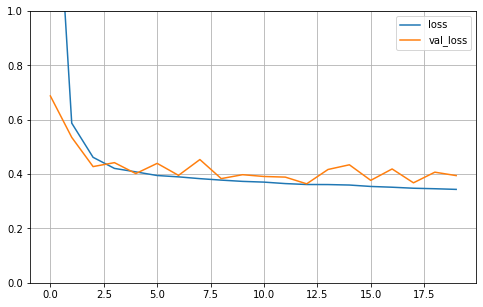

In [23]:
import pandas as pd
import matplotlib.pyplot as plt # 이 부분은 나중에 시각화 관련해서 따로 자료를 만들겠습니다.

pd.DataFrame(history.history).plot(figsize = (8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

## 모델 평가하기

Keras는 fancy한 기능을 하나 더 제공하는데요. evaluate입니다. 우리가 굳이 test를 위한 코드를 따로 만들 필요가 없습니다.

In [24]:
mse_test = model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 864us/step - loss: 0.3504
